# apriori modeling

In [81]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

### preprocessing

In [82]:
data=pd.read_csv("dataset.csv",header=None)
data=data.iloc[1:,:]
#https://www.kaggle.com/datasets/muhammadglennyunifer/groceries-data-for-market-basket-analysis

In [83]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
1,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
data.shape

(9835, 32)

In [85]:
len(data.stack().value_counts())

169

In [86]:
data.stack().value_counts()

whole milk               2513
other vegetables         1903
rolls/buns               1809
soda                     1715
yogurt                   1372
                         ... 
bags                        4
kitchen utensil             4
preservation products       2
baby food                   1
sound storage medium        1
Length: 169, dtype: int64

In [87]:
data.stack().value_counts(normalize=True)

whole milk               0.057947
other vegetables         0.043881
rolls/buns               0.041714
soda                     0.039546
yogurt                   0.031637
                           ...   
bags                     0.000092
kitchen utensil          0.000092
preservation products    0.000046
baby food                0.000023
sound storage medium     0.000023
Length: 169, dtype: float64

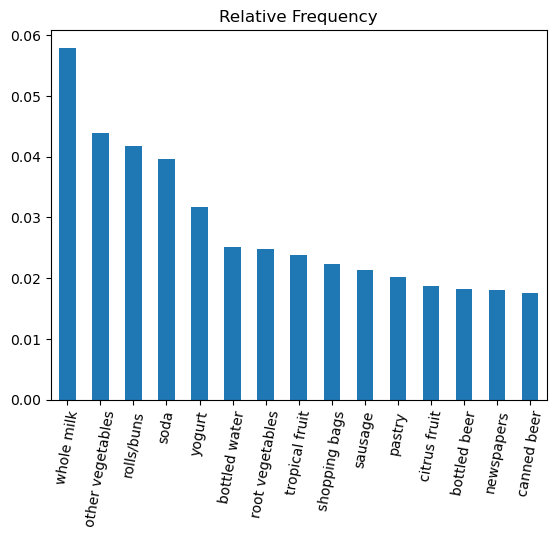

In [88]:
data.stack().value_counts(normalize=True)[:15].plot(kind='bar',title='Relative Frequency')
plt.xticks(rotation=80)
plt.show()

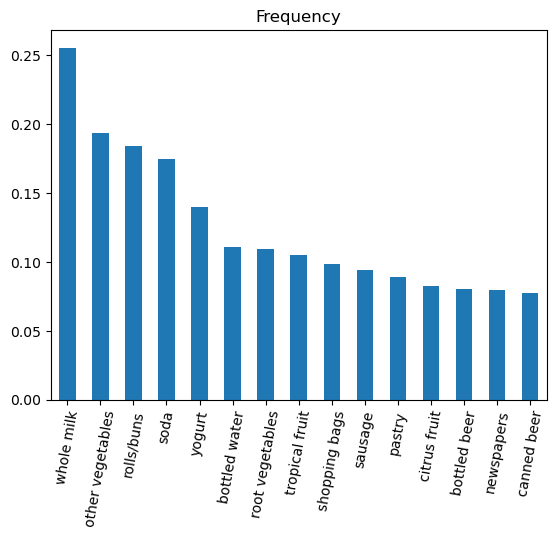

In [89]:
data.stack().value_counts().apply(lambda item:item/data.shape[0])[:15].plot(kind='bar',title="Frequency")
plt.xticks(rotation=80)
plt.show()

In [90]:
tran=[]
for i in range(len(data)):
    tran.append([str(data.values[i,j]) for j in range(len(data.columns)) if str(data.values[i,j]) != 'nan'])

### modeling

In [91]:
from apyori import apriori

In [92]:
(3*7)/9835

0.002135231316725979

In [93]:
rules=apriori(transactions=tran,min_support=.003,min_confidence=.5,min_lift=3,min_length=2,max_length=0)

In [94]:
results=list(rules)
results

[RelationRecord(items=frozenset({'beef', 'tropical fruit', 'other vegetables'}), support=0.004473817996949669, ordered_statistics=[OrderedStatistic(items_base=frozenset({'beef', 'tropical fruit'}), items_add=frozenset({'other vegetables'}), confidence=0.5866666666666667, lift=3.031984585741811)]),
 RelationRecord(items=frozenset({'whipped/sour cream', 'brown bread', 'other vegetables'}), support=0.003050330452465684, ordered_statistics=[OrderedStatistic(items_base=frozenset({'whipped/sour cream', 'brown bread'}), items_add=frozenset({'other vegetables'}), confidence=0.6521739130434783, lift=3.3705362242683177)]),
 RelationRecord(items=frozenset({'pip fruit', 'butter milk', 'other vegetables'}), support=0.003253685815963396, ordered_statistics=[OrderedStatistic(items_base=frozenset({'pip fruit', 'butter milk'}), items_add=frozenset({'other vegetables'}), confidence=0.64, lift=3.3076195480819757)]),
 RelationRecord(items=frozenset({'chicken', 'sausage', 'other vegetables'}), support=0.00

In [95]:
def inspect(results):
    lhs=[tuple(result[2][0][0])[0:] for result in results]
    rhs=[tuple(result[2][0][1])[0:] for result in results]
    support=[result[1] for result in results]
    conf=[result[2][0][2] for result in results]
    lift=[result[2][0][3] for result in results]
    return list(zip(lhs,rhs,support,conf,lift))
result_df= pd.DataFrame(inspect(results),columns=['left hand side','right hand side','support', 'confidence', 'lift'])

In [96]:
result_df.head(10)
# lift bozorgtar az 1 bashad agar x ra kharid konad ehtemalan y ra mikharad. 
# lift kamtar az 1 neshan dahande correlation manfi ast.

,left hand side,right hand side,support,confidence,lift
0,"(beef, tropical fruit)","(other vegetables,)",0.004474,0.586667,3.031985
1,"(whipped/sour cream, brown bread)","(other vegetables,)",0.003050,0.652174,3.370536
2,"(pip fruit, butter milk)","(other vegetables,)",0.003254,0.640000,3.307620
3,"(chicken, sausage)","(other vegetables,)",0.003152,0.596154,3.081016
4,"(chicken, yogurt)","(other vegetables,)",0.004881,0.585366,3.025262
5,"(citrus fruit, onions)","(other vegetables,)",0.003559,0.636364,3.288826
6,"(root vegetables, citrus fruit)","(other vegetables,)",0.010371,0.586207,3.029608
7,"(root vegetables, cream cheese)","(other vegetables,)",0.004474,0.594595,3.072957
8,"(root vegetables, cream cheese)","(yogurt,)",0.003762,0.500000,3.584184
9,"(whipped/sour cream, cream cheese)","(yogurt,)",0.003355,0.523810,3.754859


In [97]:
sort_result_df=result_df.sort_values(by=['lift'],ascending=False)

In [98]:
sort_result_df=sort_result_df.reset_index().drop('index',axis=1)

In [99]:
sort_result_df

,left hand side,right hand side,support,confidence,lift
0,"(root vegetables, tropical fruit, citrus fruit)","(whole milk, other vegetables)",0.003152,0.553571,7.397249
1,"(herbs, whole milk)","(root vegetables,)",0.004169,0.539474,4.949369
2,"(herbs, other vegetables)","(root vegetables,)",0.003864,0.500000,4.587220
3,"(whole milk, tropical fruit, curd)","(yogurt,)",0.003965,0.609375,4.368224
4,"(root vegetables, tropical fruit, citrus fruit)","(other vegetables,)",0.004474,0.785714,4.060694
5,"(butter, tropical fruit, other vegetables)","(yogurt,)",0.003050,0.555556,3.982426
6,"(whipped/sour cream, tropical fruit, whole milk)","(yogurt,)",0.004372,0.551282,3.951792
7,"(butter, tropical fruit, whole milk)","(yogurt,)",0.003355,0.540984,3.877969
8,"(root vegetables, whipped/sour cream, tropical...","(other vegetables,)",0.003355,0.733333,3.789981
9,"(whipped/sour cream, cream cheese)","(yogurt,)",0.003355,0.523810,3.754859


In [100]:
# def clean(x):
#     l=[]
#     for i in range(len(x)):
#         for j in range(len(x[i])):
#             if x[i][j]=='nan':
#                 l.append(i)
#     return(sort_result_df.drop(l,axis=0))
                

In [101]:
# clean(sort_result_df['right hand side']).head()

# Eclat modeling

In [102]:
def inspect(results):
    lhs=[tuple(result[2][0][0])[0:] for result in results]
    rhs=[tuple(result[2][0][1])[0:] for result in results]
    support=[result[1] for result in results]
    return list(zip(lhs,rhs,support))
result_df= pd.DataFrame(inspect(results),columns=['products1','products2','support'])

In [103]:
result_df.head(10)

,products1,products2,support
0,"(beef, tropical fruit)","(other vegetables,)",0.004474
1,"(whipped/sour cream, brown bread)","(other vegetables,)",0.003050
2,"(pip fruit, butter milk)","(other vegetables,)",0.003254
3,"(chicken, sausage)","(other vegetables,)",0.003152
4,"(chicken, yogurt)","(other vegetables,)",0.004881
5,"(citrus fruit, onions)","(other vegetables,)",0.003559
6,"(root vegetables, citrus fruit)","(other vegetables,)",0.010371
7,"(root vegetables, cream cheese)","(other vegetables,)",0.004474
8,"(root vegetables, cream cheese)","(yogurt,)",0.003762
9,"(whipped/sour cream, cream cheese)","(yogurt,)",0.003355


In [104]:
sort_result_df=result_df.sort_values(by=['support'],ascending=False).reset_index().drop('index',axis=1)

In [105]:
sort_result_df

,products1,products2,support
0,"(root vegetables, tropical fruit)","(other vegetables,)",0.012303
1,"(root vegetables, citrus fruit)","(other vegetables,)",0.010371
2,"(root vegetables, tropical fruit, whole milk)","(other vegetables,)",0.007016
3,"(root vegetables, whole milk, citrus fruit)","(other vegetables,)",0.005796
4,"(root vegetables, onions)","(other vegetables,)",0.005694
5,"(whipped/sour cream, pip fruit)","(other vegetables,)",0.005592
6,"(root vegetables, pip fruit, whole milk)","(other vegetables,)",0.005491
7,"(tropical fruit, curd)","(yogurt,)",0.005287
8,"(root vegetables, yogurt, tropical fruit)","(other vegetables,)",0.004982
9,"(chicken, yogurt)","(other vegetables,)",0.004881


In [106]:
# clean(sort_result_df['products2'])

## FPGrowth modeling  with pyspark

In [26]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname,filename))

In [27]:
from pyspark import  SparkContext
from pyspark.sql import functions as f,SparkSession,Column
from pyspark_dist_explore import hist
import matplotlib.pyplot as plt
from pyspark.ml.fpm import FPGrowth

In [28]:
spark=SparkSession.builder \
.appName("arlUsingPyspark") \
.getOrCreate()

In [29]:
df=spark.read.csv("dataset.csv",header=True).withColumn('id',f.monotonically_increasing_id())

In [30]:
df.show(5)

+----------------+-------------------+--------------+--------------------+------+------+------+------+------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+---+
|          Item 1|             Item 2|        Item 3|              Item 4|Item 5|Item 6|Item 7|Item 8|Item 9|Item 10|Item 11|Item 12|Item 13|Item 14|Item 15|Item 16|Item 17|Item 18|Item 19|Item 20|Item 21|Item 22|Item 23|Item 24|Item 25|Item 26|Item 27|Item 28|Item 29|Item 30|Item 31|Item 32| id|
+----------------+-------------------+--------------+--------------------+------+------+------+------+------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+---+
|    citrus fruit|semi-finished bread|     margarine|         ready soups|  null|  null|  null|  null|  nu

In [31]:
df.printSchema()

root
 |-- Item 1: string (nullable = true)
 |-- Item 2: string (nullable = true)
 |-- Item 3: string (nullable = true)
 |-- Item 4: string (nullable = true)
 |-- Item 5: string (nullable = true)
 |-- Item 6: string (nullable = true)
 |-- Item 7: string (nullable = true)
 |-- Item 8: string (nullable = true)
 |-- Item 9: string (nullable = true)
 |-- Item 10: string (nullable = true)
 |-- Item 11: string (nullable = true)
 |-- Item 12: string (nullable = true)
 |-- Item 13: string (nullable = true)
 |-- Item 14: string (nullable = true)
 |-- Item 15: string (nullable = true)
 |-- Item 16: string (nullable = true)
 |-- Item 17: string (nullable = true)
 |-- Item 18: string (nullable = true)
 |-- Item 19: string (nullable = true)
 |-- Item 20: string (nullable = true)
 |-- Item 21: string (nullable = true)
 |-- Item 22: string (nullable = true)
 |-- Item 23: string (nullable = true)
 |-- Item 24: string (nullable = true)
 |-- Item 25: string (nullable = true)
 |-- Item 26: string (nullabl

In [32]:
df_basket=df.select('id',f.array([df[c] for c in df.columns[:32]]).alias('basket'))

In [33]:
df_basket.show(5,False)

+---+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|id |basket                                                                                                                                                                                                                                          |
+---+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|0  |[citrus fruit, semi-finished bread, margarine, ready soups, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null]             |
|1  |[tropic

In [34]:
df_aggregated=df_basket.select('id',f.array_except('basket',f.array(f.lit(None))).alias('basket'))

In [35]:
df_aggregated.show(5,False)

+---+------------------------------------------------------------------------+
|id |basket                                                                  |
+---+------------------------------------------------------------------------+
|0  |[citrus fruit, semi-finished bread, margarine, ready soups]             |
|1  |[tropical fruit, yogurt, coffee]                                        |
|2  |[whole milk]                                                            |
|3  |[pip fruit, yogurt, cream cheese, meat spreads]                         |
|4  |[other vegetables, whole milk, condensed milk, long life bakery product]|
+---+------------------------------------------------------------------------+
only showing top 5 rows



### FPGrowth modeling

In [36]:
fp=FPGrowth(minSupport=.003,minConfidence=.2,itemsCol='basket',predictionCol='prediction')

In [37]:
model=fp.fit(df_aggregated)

In [38]:
model.freqItemsets.count()

2226

In [39]:
model.freqItemsets.show(10,False)

+-------------------------------------+----+
|items                                |freq|
+-------------------------------------+----+
|[chocolate marshmallow]              |89  |
|[chocolate marshmallow, whole milk]  |31  |
|[rice]                               |75  |
|[rice, other vegetables]             |39  |
|[rice, root vegetables]              |31  |
|[rice, whole milk]                   |46  |
|[canned vegetables]                  |106 |
|[canned vegetables, yogurt]          |30  |
|[canned vegetables, other vegetables]|46  |
|[canned vegetables, soda]            |30  |
+-------------------------------------+----+
only showing top 10 rows



In [40]:
model.associationRules.filter(model.associationRules.confidence>0.51).count()

371

In [41]:
model.associationRules.filter(model.associationRules.confidence>0.71).show(10,False)

+-----------------------------------------------------------+------------------+------------------+------------------+---------------------+
|antecedent                                                 |consequent        |confidence        |lift              |support              |
+-----------------------------------------------------------+------------------+------------------+------------------+---------------------+
|[citrus fruit, tropical fruit, root vegetables]            |[other vegetables]|0.7857142857142857|4.060693641618497 |0.004473817996949669 |
|[brown bread, root vegetables, other vegetables]           |[whole milk]      |0.775             |3.0330779944289694|0.00315200813421454  |
|[onions, butter]                                           |[whole milk]      |0.75              |2.9352367688022283|0.003050330452465684 |
|[citrus fruit, tropical fruit, root vegetables, whole milk]|[other vegetables]|0.8857142857142857|4.5775091960063055|0.00315200813421454  |
|[tropical fr

# SON_Algorithm

In [42]:
import sys
import os
import itertools
from pyspark import SparkContext

In [43]:
baskets=[]
for basket in range(len(data)):
    baskets.append(list(data.iloc[basket,:]))
print(baskets)

[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], ['tropical fruit', 'yogurt', 'coffee', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], ['whole milk', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], ['pip fruit', 'yogurt', 'cream cheese', 'meat spreads', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], ['other vegetables', 'whole milk', 'condensed milk', 'long life bakery product', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], ['whole milk', 

In [44]:
not_nan_baskets=[]
for basket in baskets:
    l=[]
    for item in basket:
        if str(item) != 'nan':
            l.append(item)
    not_nan_baskets.append(l)

print(len(not_nan_baskets))

9835


In [45]:
def getSingleFrequent(baskets,s):
    support=len(baskets)*s
    result=[]
    countTable={}
    for basket in baskets:
        for item in basket:
            countTable.setdefault(item,0)
            countTable[item]+=1
#     print(support)
#     print(countTable)
    for item,count in countTable.items():
        if count>=support:
            result.append(item)
    return sorted(result)

In [55]:
a=getSingleFrequent(baskets=not_nan_baskets,s=.003)

In [149]:
k=2
l=[]

if k==2:
    pair=[(e1,e2) for i,e1 in enumerate(a) for j,e2 in enumerate(a) if j>i]
    l.append([p for p in pair if len(p)==2 and p not in l])
else:
#     common=[set(e1).intersection(set(e2)) for i,e1 in enumerate(a) for j,e2 in enumerate(a) if j>i]
     for i,e1 in enumerate(a):
            for j,e2 in enumerate(a):
                if j>i:
                    common=set(e1).intersection(set(e2))
                    if len(common)==k-2:
                        pair= (e1,e2)
#                         print(pair)
                        if pair not in l:
                            pairs=list(itertools.combinations(pair,k-1))
                            c=0
                            for p in pairs:
                                if c==k-2:
                                    break
                                if common.issubset(p)==False:
                                    if set(p) in a:
                                        c=c+1
                            if c==k-2:
                                l.append(pair)
print(l)
                            

[[('Instant food products', 'UHT-milk'), ('Instant food products', 'abrasive cleaner'), ('Instant food products', 'artif. sweetener'), ('Instant food products', 'baking powder'), ('Instant food products', 'beef'), ('Instant food products', 'berries'), ('Instant food products', 'beverages'), ('Instant food products', 'bottled beer'), ('Instant food products', 'bottled water'), ('Instant food products', 'brandy'), ('Instant food products', 'brown bread'), ('Instant food products', 'butter'), ('Instant food products', 'butter milk'), ('Instant food products', 'cake bar'), ('Instant food products', 'candles'), ('Instant food products', 'candy'), ('Instant food products', 'canned beer'), ('Instant food products', 'canned fish'), ('Instant food products', 'canned fruit'), ('Instant food products', 'canned vegetables'), ('Instant food products', 'cat food'), ('Instant food products', 'cereals'), ('Instant food products', 'chewing gum'), ('Instant food products', 'chicken'), ('Instant food pro

In [ ]:
def SON(baskets, support):
    # bayad tabdil be (F,1)konim (F ha frequent item set ha hastand):
    first_map = baskets.mapPartitions(model.freqItemsets)  
    # dar reduce bayad tedad har kodam az F hara shomaresh kard(F ha key ha hastand)
    first_red = first_map.reduceByKey(candidateItemsets) 
    # dar map dovom joft candidate (candidate,support) ra midahad.
    sec_map = baskets.mapPartitions(countSupportForEachCandidate)
    # red dovom niz kol support ra baraye har item candidate mohasebe mikonad.
    sec_red = sec_map.reduceByKey(x,y => x + y)
    
    output = sec_red.filter( x => x.count >= support )